In [1]:
# Mohammad Hossein Zehtab
# Exercise_Golf_Play_Classification_Decision_Tree_Using_Sklearn

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import dtreeviz

# Importing sklearn tools and algorithms
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Ignoring warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
%%writefile ./Golf_Play.csv
outlook,temperature,humidity,windy,play
sunny,hot,high,false,no
sunny,hot,high,true,no
overcast,hot,high,false,yes
rainy,mild,high,false,yes
rainy,cool,normal,false,yes
rainy,cool,normal,true,no
overcast,cool,normal,true,yes
sunny,mild,high,false,no
sunny,cool,normal,false,yes
rainy,mild,normal,false,yes
sunny,mild,normal,true,yes
overcast,mild,high,true,yes
overcast,hot,normal,false,yes
rainy,mild,high,true,no

Overwriting ./Golf_Play.csv


In [4]:
# Reading from csv dataset
df = pd.read_csv("Golf_Play.csv")
df.shape

(14, 5)

In [5]:
df.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [6]:
# One hot encoding of 'outlook' feature
df1 = pd.get_dummies(data = df, columns=["outlook"], dtype=int)
df1.tail()

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
9,mild,normal,False,yes,0,1,0
10,mild,normal,True,yes,0,0,1
11,mild,high,True,yes,1,0,0
12,hot,normal,False,yes,1,0,0
13,mild,high,True,no,0,1,0


In [7]:
# Ordinal encoding of 'temperature' feature
order_dict = {"cool" : 1, "mild" : 2 , "hot" : 3}
df2 = df1.assign(temperature_ord = df["temperature"].map(order_dict))
df2 = df2.drop(columns="temperature")
df2.sample(5)

,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_ord
6,normal,True,yes,1,0,0,1
0,high,False,no,0,0,1,3
8,normal,False,yes,0,0,1,1
5,normal,True,no,0,1,0,1
2,high,False,yes,1,0,0,3


In [8]:
# Binary encoding of 'humidity' feature
df3 = df2.assign(humidity_binary = (df2["humidity"] == "normal").astype(int))
df3 = df3.drop(columns="humidity")
df3.head()

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_ord,humidity_binary
0,False,no,0,0,1,3,0
1,True,no,0,0,1,3,0
2,False,yes,1,0,0,3,0
3,False,yes,0,1,0,2,0
4,False,yes,0,1,0,1,1


In [9]:
# Binary encoding of 'windy' feature
df4 = df3.assign(windy_binary = df3["windy"].astype(int))
df4 = df4.drop(columns="windy")
df4.tail()

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_ord,humidity_binary,windy_binary
9,yes,0,1,0,2,1,0
10,yes,0,0,1,2,1,1
11,yes,1,0,0,2,0,1
12,yes,1,0,0,3,1,0
13,no,0,1,0,2,0,1


In [10]:
# Binary encoding of 'play' target
df5 = df4.assign(play_binary = (df4["play"] == "yes").astype(int))
df5 = df5.drop(columns="play")
df5

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_ord,humidity_binary,windy_binary,play_binary
0,0,0,1,3,0,0,0
1,0,0,1,3,0,1,0
2,1,0,0,3,0,0,1
3,0,1,0,2,0,0,1
4,0,1,0,1,1,0,1
5,0,1,0,1,1,1,0
6,1,0,0,1,1,1,1
7,0,0,1,2,0,0,0
8,0,0,1,1,1,0,1
9,0,1,0,2,1,0,1


In [11]:
# Copying 'df5' into 'df_clean'
df_clean = df5.copy()
df_clean.sample(5)

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_ord,humidity_binary,windy_binary,play_binary
1,0,0,1,3,0,1,0
6,1,0,0,1,1,1,1
5,0,1,0,1,1,1,0
11,1,0,0,2,0,1,1
3,0,1,0,2,0,0,1


In [12]:
# Creating feature matrix X
X = df_clean.drop(columns="play_binary")
X.shape

(14, 6)

In [13]:
# Creating target vector y
y = df_clean["play_binary"]
y.shape

(14,)

In [14]:
# Creating classifier object
dtclf = DecisionTreeClassifier()

In [15]:
# Fitting classifier object on data
dtclf.fit(X, y)

DecisionTreeClassifier()

In [16]:
# Accuracy score of the model
dtclf.score(X, y)

1.0

In [17]:
# Text representation of the decision tree
text_representation = export_text(dtclf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- class: 1



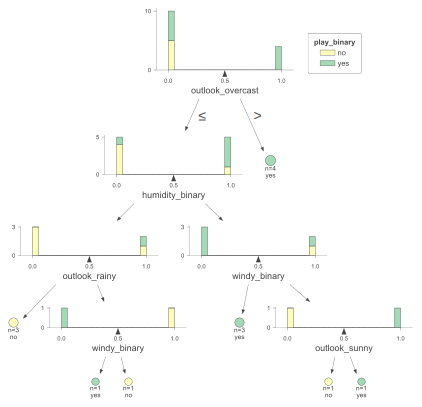

In [18]:
# Visualization of the decision tree using 'dtreeviz'
feature_names = df_clean.columns.tolist()[:-1]
dtviz = dtreeviz.model(dtclf,
                       X,
                       y,
                       feature_names=feature_names,
                       target_name="play_binary",
                       class_names=['no', 'yes'])
dtviz.view()

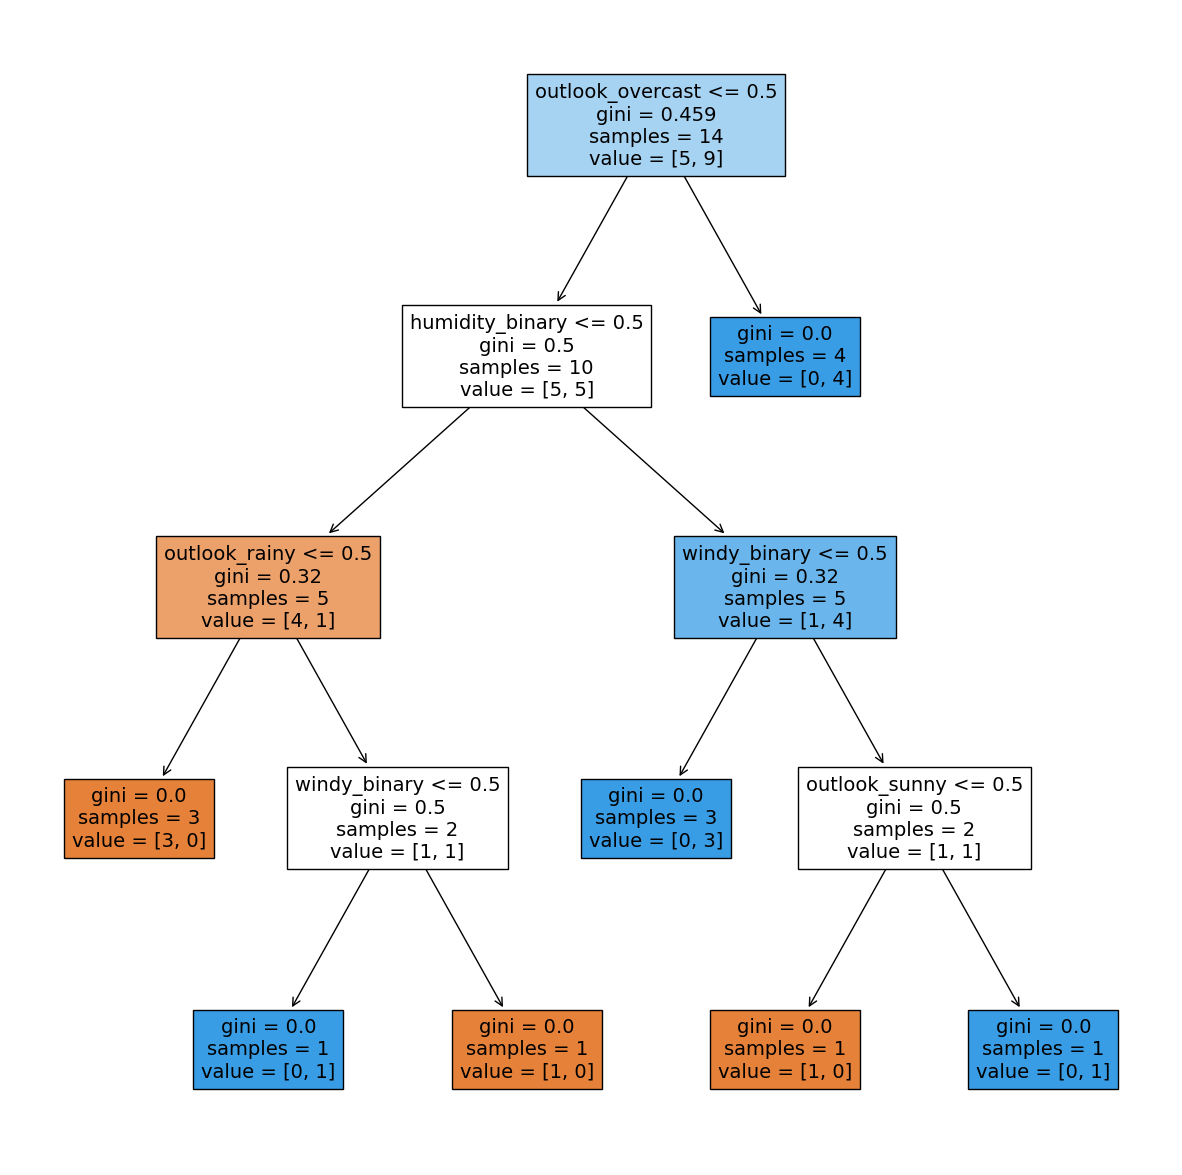

In [20]:
# Visualization of the decision tree using 'plot_tree'
fig = plt.figure(figsize=[15, 15])
_ = plot_tree(dtclf, 
              feature_names=feature_names, 
              filled=True)